<a href="https://colab.research.google.com/github/jpivato00/projeto_parceria_EbacM25/blob/main/Projeto_de_parceria__EBAC__Juliana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PROJETO DE PARCERIA***

## **Objetivo**:Gerar um modelo de predição de balanço de vida e trabalho.




In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/education-and-career-success")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/adilshamim8/education-and-career-success/versions/1


In [ ]:
mv /root/.cache/kagglehub/datasets/adilshamim8/education-and-career-success/versions/1/* /content/

mv: cannot stat '/root/.cache/kagglehub/datasets/adilshamim8/education-and-career-success/versions/1/*': No such file or directory


**Remoção**

Foi realizada uma remoção do ranking universitario a fim de facilitar a geração dos resultados por conta da dificultade observada em lidar com as variáveis ordinárias em modelo de predição.

In [ ]:
import pandas as pd

df=pd.read_csv('education_career_success.csv')
df.drop(columns=['University_Ranking'])
df_original=df.copy()
df.describe()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000


# Identificação dos dados:

In [ ]:
df.head()


,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


# Padronização das variáveis para alimentação do modelo:

In [ ]:
df['Gender'].drop_duplicates()

,Gender
0,Male
1,Other
2,Female


In [ ]:
male=df[df['Gender']== 'Male']
#male.describe()
female=df[df['Gender']== 'Female']
other=df[df['Gender']== 'Other']

#male.describe()

job_offers_male_media = male['Job_Offers'].mean()
job_offers_female_media = female['Job_Offers'].mean()
job_offers_other_media = other['Job_Offers'].mean()

print(job_offers_male_media, job_offers_female_media, job_offers_other_media)

2.48820179007323 2.5051063829787235 2.296875


In [ ]:
std_male=male['Job_Offers'].std()
std_female=female['Job_Offers'].std()
std_other=other['Job_Offers'].std()

print(std_female, std_male, std_other)

1.706352382086897 1.715186050430505 1.7336795071488424


In [ ]:
satisfaction_male=male['Career_Satisfaction'].mean()
satisfaction_female=female['Career_Satisfaction'].mean()
satisfaction_other=other['Career_Satisfaction'].mean()

print(satisfaction_male,satisfaction_female,satisfaction_other)

5.591944670463792 5.557021276595744 5.65625


# Análise de campo de estudo:

In [ ]:
df['Field_of_Study'].drop_duplicates()

,Field_of_Study
0,Arts
1,Law
2,Medicine
3,Computer Science
4,Engineering
8,Business
10,Mathematics


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Arts'),
  Text(1, 0, 'Business'),
  Text(2, 0, 'Computer Science'),
  Text(3, 0, 'Engineering'),
  Text(4, 0, 'Law'),
  Text(5, 0, 'Mathematics'),
  Text(6, 0, 'Medicine')])

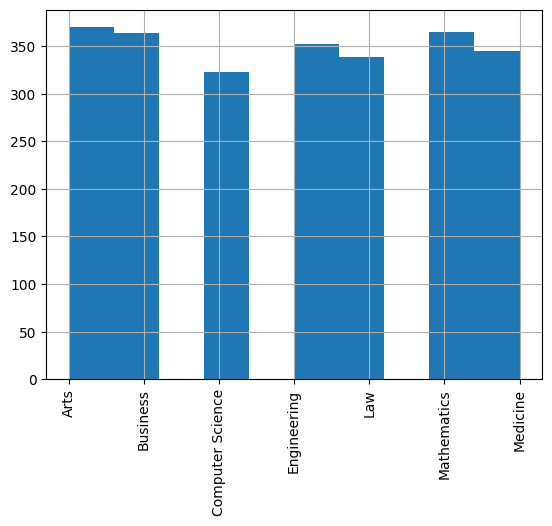

In [ ]:
"""
study_area_male=male['Field_of_Study'].mean()
study_area_female=female['Field_of_Study'].mean()
study_area_other=other['Field_of_Study'].mean()

print(satisfaction_male,satisfaction_female,satisfaction_other)
"""
import matplotlib.pyplot as plt


male.sort_values(by='Field_of_Study')['Field_of_Study'].hist()
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Arts'),
  Text(1, 0, 'Business'),
  Text(2, 0, 'Computer Science'),
  Text(3, 0, 'Engineering'),
  Text(4, 0, 'Law'),
  Text(5, 0, 'Mathematics'),
  Text(6, 0, 'Medicine')])

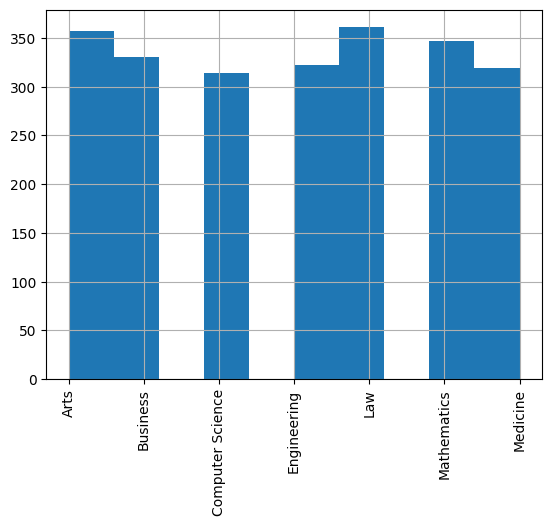

In [ ]:
female.sort_values(by='Field_of_Study')['Field_of_Study'].hist()
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Arts'),
  Text(1, 0, 'Business'),
  Text(2, 0, 'Computer Science'),
  Text(3, 0, 'Engineering'),
  Text(4, 0, 'Law'),
  Text(5, 0, 'Mathematics'),
  Text(6, 0, 'Medicine')])

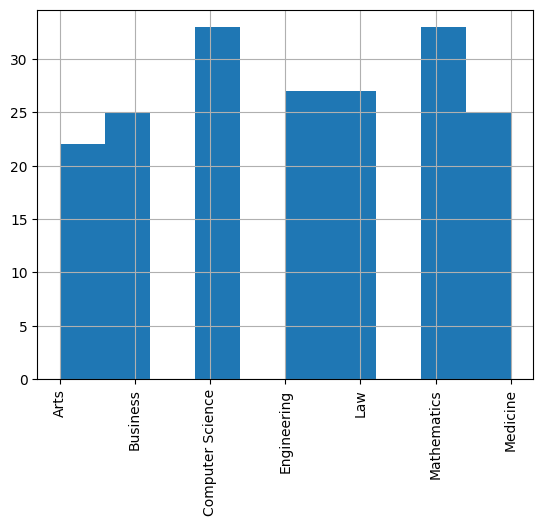

In [ ]:
other.sort_values(by='Field_of_Study')['Field_of_Study'].hist()
plt.xticks(rotation=90)

# Análise de média salarial por gênero:

In [ ]:
starting_salary_media_male = male['Starting_Salary'].mean()
starting_salary_media_female= female['Starting_Salary'].mean()
starting_salary_media_other = other['Starting_Salary'].mean()

print(starting_salary_media_male, starting_salary_media_female, starting_salary_media_other)

50649.75589910497 50536.425531914894 49791.666666666664


Análise entre a relação das taxas de empreendedorismo por área de atuação:

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Arts'),
  Text(1, 0, 'Business'),
  Text(2, 0, 'Computer Science'),
  Text(3, 0, 'Engineering'),
  Text(4, 0, 'Law'),
  Text(5, 0, 'Mathematics'),
  Text(6, 0, 'Medicine')])

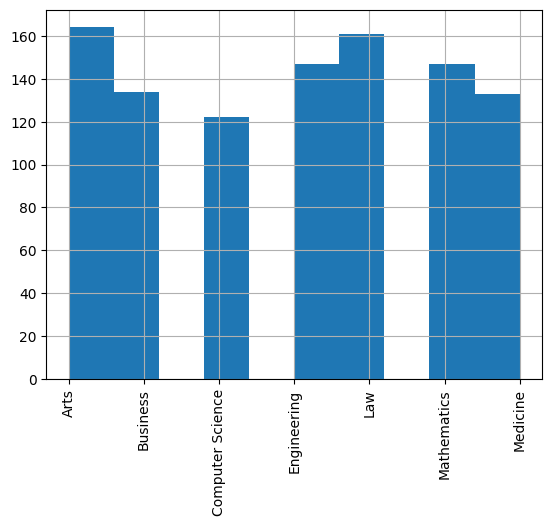

In [ ]:

empreendedores=df[df['Entrepreneurship']=='Yes']


empreendedores.sort_values(by='Field_of_Study')['Field_of_Study'].hist()
plt.xticks(rotation=90)


# Identificando as variáveis categórias e convertendo seus respectivos valores para adequação ao modelo de regressão:

In [ ]:

df['Arts_nom'] = df['Field_of_Study'].apply(lambda x: 1 if x=='Arts' else 0)

df['Business_nom'] = df['Field_of_Study'].apply(lambda x: 1 if x=='Business' else 0)

df['Computer Science_nom'] = df['Field_of_Study'].apply(lambda x: 1 if x=='Computer Science' else 0)

df['Engineering_nom'] = df['Field_of_Study'].apply(lambda x: 1 if x=='Engineering' else 0)

df['Law_nom'] = df['Field_of_Study'].apply(lambda x: 1 if x=='Law' else 0)

df['Mathematics_nom'] = df['Field_of_Study'].apply(lambda x: 1 if x=='Mathematics' else 0)

df['Medicine_nom'] = df['Field_of_Study'].apply(lambda x: 1 if x=='Medicine' else 0)

df

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,...,Current_Job_Level,Work_Life_Balance,Entrepreneurship,Arts_nom,Business_nom,Computer Science_nom,Engineering_nom,Law_nom,Mathematics_nom,Medicine_nom
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,...,Entry,7,No,1,0,0,0,0,0,0
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,...,Mid,7,No,0,0,0,0,1,0,0
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,...,Entry,7,No,0,0,0,0,0,0,1
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,...,Mid,5,No,0,0,1,0,0,0,0
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,...,Entry,2,No,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,...,Mid,7,No,1,0,0,0,0,0,0
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,...,Entry,4,No,0,0,0,0,1,0,0
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,...,Mid,6,No,0,0,0,0,1,0,0
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,...,Entry,6,No,0,0,0,0,1,0,0


In [ ]:
df['Male_nom'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0)

df['Female_nom'] = df['Gender'].apply(lambda x: 1 if x=='Female' else 0)

df['Other_nom'] = df['Gender'].apply(lambda x: 1 if x=='Other' else 0)

df

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,...,Arts_nom,Business_nom,Computer Science_nom,Engineering_nom,Law_nom,Mathematics_nom,Medicine_nom,Male_nom,Female_nom,Other_nom
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,...,1,0,0,0,0,0,0,1,0,0
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,...,0,0,0,0,1,0,0,0,0,1
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,...,0,0,0,0,0,0,1,0,1,0
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,...,0,0,1,0,0,0,0,1,0,0
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,...,1,0,0,0,0,0,0,0,1,0
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,...,0,0,0,0,1,0,0,0,1,0
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,...,0,0,0,0,1,0,0,0,1,0
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
df['Yes_nom'] = df['Entrepreneurship'].apply(lambda x: 1 if x=='Yes' else 0)

df['No_nom'] = df['Entrepreneurship'].apply(lambda x: 1 if x=='No' else 0)

df

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,...,Computer Science_nom,Engineering_nom,Law_nom,Mathematics_nom,Medicine_nom,Male_nom,Female_nom,Other_nom,Yes_nom,No_nom
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,...,0,0,0,0,0,1,0,0,0,1
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,...,0,0,1,0,0,0,0,1,0,1
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,...,0,0,0,0,1,0,1,0,0,1
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,...,1,0,0,0,0,1,0,0,0,1
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,...,0,0,0,0,0,0,1,0,0,1
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,...,0,0,1,0,0,0,1,0,0,1
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,...,0,0,1,0,0,0,1,0,0,1
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df['Current_Job_Level'].drop_duplicates()


,Current_Job_Level
0,Entry
1,Mid
9,Senior
29,Executive


In [ ]:
df['Entry_nom'] = df['Current_Job_Level'].apply(lambda x: 1 if x=='Entry' else 0)

df['Mid_nom'] = df['Current_Job_Level'].apply(lambda x: 1 if x=='Mid' else 0)

df['Senior_nom'] = df['Current_Job_Level'].apply(lambda x: 1 if x=='Senior' else 0)

df['Executive_nom'] = df['Current_Job_Level'].apply(lambda x: 1 if x=='Executive' else 0)

df.head()


,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,...,Medicine_nom,Male_nom,Female_nom,Other_nom,Yes_nom,No_nom,Entry_nom,Mid_nom,Senior_nom,Executive_nom
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,...,0,1,0,0,0,1,1,0,0,0
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,...,0,0,0,1,0,1,0,1,0,0
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,...,1,0,1,0,0,1,1,0,0,0
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,...,0,1,0,0,0,1,0,1,0,0
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,...,0,1,0,0,0,1,1,0,0,0


# Padronização das variáveis numéricas:

In [ ]:
campos=['Age','High_School_GPA','SAT_Score',
        'University_GPA','Internships_Completed','Projects_Completed',
        'Certifications', 'Soft_Skills_Score','Networking_Score',	'Job_Offers',
        'Starting_Salary',	'Career_Satisfaction',	'Years_to_Promotion','Work_Life_Balance']

for campo in campos:
    df[campo+'_std']= df[campo].apply(lambda x: (x - df[campo].mean()) / df[campo].std())

df

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,...,Internships_Completed_std,Projects_Completed_std,Certifications_std,Soft_Skills_Score_std,Networking_Score_std,Job_Offers_std,Starting_Salary_std,Career_Satisfaction_std,Years_to_Promotion_std,Work_Life_Balance_std
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,...,0.722757,0.848334,-0.300731,1.211437,0.863834,1.466943,-1.611839,-0.549444,1.399842,0.526318
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,...,1.432874,0.848334,0.286405,0.860702,-1.592234,0.882783,-1.763616,-1.594013,-1.422136,0.526318
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,...,1.432874,1.196411,-0.887867,-1.594439,1.214701,-1.453858,-0.563199,1.191506,-0.011147,0.526318
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,...,0.722757,1.544488,-0.887867,1.562172,0.162100,-0.869698,0.471644,0.495126,1.399842,-0.167301
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,...,1.432874,0.500256,0.873541,1.562172,1.214701,0.882783,-0.204453,1.191506,1.399842,-1.207729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,...,0.722757,0.848334,0.286405,0.860702,-0.188766,1.466943,-1.315184,1.191506,1.399842,0.526318
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,...,-1.407594,1.544488,0.286405,0.159233,-0.539633,1.466943,-0.604592,1.191506,-0.716641,-0.514110
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,...,0.722757,0.152179,1.460677,0.159233,-1.241367,-0.285538,-0.073373,-1.245823,1.399842,0.179509
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,...,-0.697477,-0.195898,1.460677,-0.191501,-1.592234,1.466943,0.285372,1.191506,0.694348,0.179509


# Limpeza: Remoção das variáveis já padronizadas.





In [ ]:
cols=df.columns
#print(c)

c1=[label for label in cols if "_std" in label]
c2=[label for label in cols if "_nom" in label]
c3=[label for label in cols if "_ord" in label]
print(c1 + c2 +c3)

df=df[c1+c2+c3]
df.head()
#df.info()

['Age_std', 'High_School_GPA_std', 'SAT_Score_std', 'University_GPA_std', 'Internships_Completed_std', 'Projects_Completed_std', 'Certifications_std', 'Soft_Skills_Score_std', 'Networking_Score_std', 'Job_Offers_std', 'Starting_Salary_std', 'Career_Satisfaction_std', 'Years_to_Promotion_std', 'Work_Life_Balance_std', 'Arts_nom', 'Business_nom', 'Computer Science_nom', 'Engineering_nom', 'Law_nom', 'Mathematics_nom', 'Medicine_nom', 'Male_nom', 'Female_nom', 'Other_nom', 'Yes_nom', 'No_nom', 'Entry_nom', 'Mid_nom', 'Senior_nom', 'Executive_nom']


,Age_std,High_School_GPA_std,SAT_Score_std,University_GPA_std,Internships_Completed_std,Projects_Completed_std,Certifications_std,Soft_Skills_Score_std,Networking_Score_std,Job_Offers_std,...,Medicine_nom,Male_nom,Female_nom,Other_nom,Yes_nom,No_nom,Entry_nom,Mid_nom,Senior_nom,Executive_nom
0,0.160578,1.012765,-0.993126,1.631762,0.722757,0.848334,-0.300731,1.211437,0.863834,1.466943,...,0,1,0,0,0,1,1,0,0,0
1,-0.703052,-0.828557,-0.210757,1.058892,1.432874,0.848334,0.286405,0.860702,-1.592234,0.882783,...,0,0,0,1,0,1,0,1,0,0
2,1.312084,0.734830,-0.299327,-0.677076,1.432874,1.196411,-0.887867,-1.594439,1.214701,-1.453858,...,1,0,1,0,0,1,1,0,0,0
3,0.448454,-0.984895,1.196522,-0.364602,0.722757,1.544488,-0.887867,1.562172,0.162100,-0.869698,...,0,1,0,0,0,1,0,1,0,0
4,-0.415176,-1.592879,-1.189949,-0.937472,1.432874,0.500256,0.873541,1.562172,1.214701,0.882783,...,0,1,0,0,0,1,1,0,0,0


# Criação do modelo ne regressão linear. O modelo pretende prever o balanço entre vida e trabalho (Work_Life_Balance) de um indivíduo.

In [ ]:


from sklearn.model_selection import train_test_split

df.drop(columns=['Work_Life_Balance_std'], inplace=True)
#df.drop(columns=['Student_ID'], inplace=True)
atributos = df.values
resposta = df_original['Work_Life_Balance'].values
xtrain, xtest, ytrain, ytest = train_test_split(atributos, resposta, test_size = 0.33, random_state = 987)

from sklearn.linear_model import LinearRegression

modelo_reg_linear = LinearRegression()
modelo_reg_linear.fit(xtrain, ytrain)

modelo_reg_linear.__dict__

<ipython-input-128-f5054c8f1324>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Work_Life_Balance_std'], inplace=True)


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 29,
 'coef_': array([ 0.00064068, -0.07450032,  0.02887584,  0.06049304, -0.01323679,
        -0.02766332, -0.0492069 ,  0.00221601, -0.0329843 , -0.05962018,
         0.01032077,  0.0383961 ,  0.03283108, -0.07217327,  0.202877  ,
         0.11986244, -0.05029008, -0.10058553, -0.02665781, -0.07303276,
         0.00430839, -0.00620974,  0.00190134, -0.01599236,  0.01599236,
        -0.18842608,  0.10970673, -0.06867898,  0.14739833]),
 'rank_': 25,
 'singular_': array([6.02976221e+01, 5.94473302e+01, 5.92613828e+01, 5.89495440e+01,
        5.88075671e+01, 5.84039281e+01, 5.82032962e+01, 5.77889279e+01,
        5.67920309e+01, 5.67016486e+01, 5.62774366e+01, 5.56222527e+01,
        5.54079770e+01, 4.00490974e+01, 3.60304424e+01, 3.26225385e+01,
        2.49832184e+01, 2.26201581e+01, 2.24325756e+01, 2.19929286e+01,
        2.15127601e+01, 2.12361885e+01, 2.10253343e+01, 1.36370621e+01,
    

# Treinamento do modelo:

In [ ]:
import numpy as np

from sklearn.metrics import mean_squared_error

y_predict = modelo_reg_linear.predict(xtest)

rmse = np.sqrt( mean_squared_error(ytest, y_predict) )
print(f'RMSE: {round(rmse,1)}')

RMSE: 2.9


In [ ]:
df.columns

Index(['Age_std', 'High_School_GPA_std', 'SAT_Score_std', 'University_GPA_std',
       'Internships_Completed_std', 'Projects_Completed_std',
       'Certifications_std', 'Soft_Skills_Score_std', 'Networking_Score_std',
       'Job_Offers_std', 'Starting_Salary_std', 'Career_Satisfaction_std',
       'Years_to_Promotion_std', 'Arts_nom', 'Business_nom',
       'Computer Science_nom', 'Engineering_nom', 'Law_nom', 'Mathematics_nom',
       'Medicine_nom', 'Male_nom', 'Female_nom', 'Other_nom', 'Yes_nom',
       'No_nom', 'Entry_nom', 'Mid_nom', 'Senior_nom', 'Executive_nom'],
      dtype='object')

In [ ]:
c_std=[label for label in cols if "_std" in label]
c=[l[:-4] for l in c_std]


In [ ]:
df_original.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [ ]:
df.head()

,Age_std,High_School_GPA_std,SAT_Score_std,University_GPA_std,Internships_Completed_std,Projects_Completed_std,Certifications_std,Soft_Skills_Score_std,Networking_Score_std,Job_Offers_std,...,Medicine_nom,Male_nom,Female_nom,Other_nom,Yes_nom,No_nom,Entry_nom,Mid_nom,Senior_nom,Executive_nom
0,0.160578,1.012765,-0.993126,1.631762,0.722757,0.848334,-0.300731,1.211437,0.863834,1.466943,...,0,1,0,0,0,1,1,0,0,0
1,-0.703052,-0.828557,-0.210757,1.058892,1.432874,0.848334,0.286405,0.860702,-1.592234,0.882783,...,0,0,0,1,0,1,0,1,0,0
2,1.312084,0.734830,-0.299327,-0.677076,1.432874,1.196411,-0.887867,-1.594439,1.214701,-1.453858,...,1,0,1,0,0,1,1,0,0,0
3,0.448454,-0.984895,1.196522,-0.364602,0.722757,1.544488,-0.887867,1.562172,0.162100,-0.869698,...,0,1,0,0,0,1,0,1,0,0
4,-0.415176,-1.592879,-1.189949,-0.937472,1.432874,0.500256,0.873541,1.562172,1.214701,0.882783,...,0,1,0,0,0,1,1,0,0,0


# Criação de um indivíduo:

In [ ]:
df.columns

Index(['Age_std', 'High_School_GPA_std', 'SAT_Score_std', 'University_GPA_std',
       'Internships_Completed_std', 'Projects_Completed_std',
       'Certifications_std', 'Soft_Skills_Score_std', 'Networking_Score_std',
       'Job_Offers_std', 'Starting_Salary_std', 'Career_Satisfaction_std',
       'Years_to_Promotion_std', 'Arts_nom', 'Business_nom',
       'Computer Science_nom', 'Engineering_nom', 'Law_nom', 'Mathematics_nom',
       'Medicine_nom', 'Male_nom', 'Female_nom', 'Other_nom', 'Yes_nom',
       'No_nom', 'Entry_nom', 'Mid_nom', 'Senior_nom', 'Executive_nom'],
      dtype='object')

In [ ]:
dic={'Age_std':27,
     'High_School_GPA_std':3.5,
     'SAT_Score_std':1005,
     'University_GPA_std':2.5,
     'Internships_Completed_std':2,
     'Projects_Completed_std': 4,
     'Certifications_std':1,
     'Soft_Skills_Score_std':3,
     'Networking_Score_std':7,
     'Job_Offers_std':6,
     'Starting_Salary_std':27300,
     'Career_Satisfaction_std':7,
     'Years_to_Promotion_std':7,
     'Arts_nom':0,
     'Business_nom':0,
     'Computer Science_nom':0,
     'Engineering_nom':0,
     'Law_nom':0,
     'Mathematics_nom':1,
     'Medicine_nom':0,
     'Male_nom':0,
     'Female_nom':0,
     'Other_nom':1,
     'Yes_nom':0,
     'No_nom':1,
     'Entry_nom':0,
     'Mid_nom':1,
     'Senior_nom':0,
     'Executive_nom':0}


Padronização das características do indivíduo:

In [ ]:
caracteristicas=list(dic.values())[0:14]
estudante=[]

for i in range (len(c)):
    estudante.append((caracteristicas[i] - df_original[c[i]].mean() )/ df_original[c[i]].std())

estudante+=list(dic.values())[14:]
estudante=np.array(estudante)







# **Análise entre vida/trabalho:**





In [ ]:
work_life_balance=modelo_reg_linear.predict(estudante.reshape(1,-1))
print(work_life_balance)

[5.64561263]


Análise de balanço entre vida e trabalho de um estudante/trabalhador com variação de métrica entre 1 e 10, onde a predição do indivíduo criado gerou o resultado de 5.6.